In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_sample_images
from scipy.ndimage import convolve

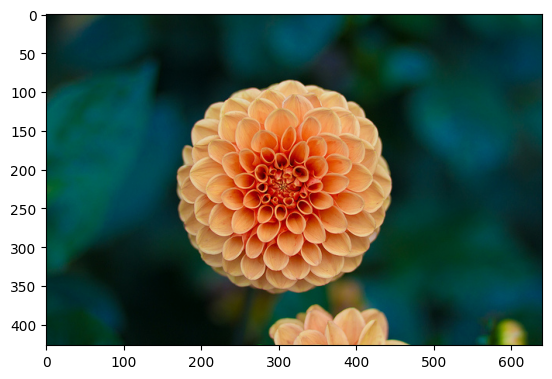

In [34]:
china, flower = load_sample_images()['images']
plt.imshow(flower)

In [35]:
def transform(image, matrix):
    max_x, max_y, vector_image = 0, 0, []
    for y, row in  enumerate(image):
        vector_image.append([])
        for x, rgb in enumerate(row):
            tx, ty = np.matmul(matrix,(x, y))
            vector_image[-1].append(((tx,ty),tuple(rgb)))
            abs_tx, abs_ty = abs(tx), abs(ty)
            if abs_tx > max_x: max_x = abs_tx
            if abs_ty > max_y: max_y = abs_ty
    transformed_image = [[[0,0,0] for _ in range(max_x + 1)] for __ in range(max_y + 1)]
    for row in vector_image:
        for (x, y), rgb in row:
            transformed_image[y][x] = rgb
    return transformed_image

In [36]:
transformed_image = transform(flower, [[1,1],[5,1]])

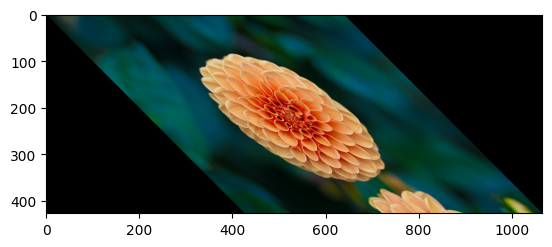

In [37]:
plt.imshow(transform(flower, [[1,1],
                              [0,1]]))

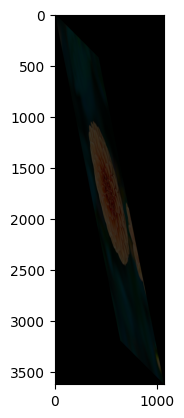

In [38]:
plt.imshow(transformed_image)

If det(matrix) > 1 then imputation must be implemented

In [39]:
y, x, z = np.array(transformed_image).shape
kernel = np.zeros((y,x,z))
kernel[y//2-y//40:y//2+y//40,x//2-x//40:x//2+x//40,:] = 1
convolved_image = convolve(transformed_image,kernel) #TODO

MemoryError: 